# Sentiment Prediction on IMDB 

**The Plan**

Compare `CountVectorizer` to `Doc2Vec` using 2-3 different classifiers models to predict movie review sentiment label. 
- Logistic Regression 
- SVM
- Random Forest

## import packages 

In [16]:
import pandas as pd
from time import time
import sys
sys.path.append("/Users/lesleymi/data_science_tutorials/IMDB_Sentiment_Analysis/src")
import imdb_functions as imdb

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

## load data 

### train

In [2]:
# load extracted doc2vec vectors 
X_train = pd.read_csv("data/train_d2v.csv").drop(labels='Unnamed: 0', axis=1)
y_train = pd.read_csv('data/Train.csv').label

In [3]:
X_train.head(2)

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,0.784555,-0.397502,-0.331985,0.965592,2.012932,1.887488,0.510781,3.288674,3.433098,-3.791230,...,-1.244086,1.192884,0.891242,2.866597,8.549128,-0.478778,1.692087,2.417104,1.771905,-1.312251
1,1.027664,-3.786560,-1.583889,3.124440,-0.892188,-1.558567,3.319089,1.988021,2.089380,-0.524098,...,0.397586,2.595252,2.952577,-2.684180,1.753658,-1.200642,-0.714399,-1.440350,1.549200,-1.613970


### validation 

In [4]:
# load d2v vectors for valid set 
X_valid = pd.read_csv("data/valid_d2v.csv").drop(labels='Unnamed: 0', axis=1)
y_valid = pd.read_csv("data/Valid.csv").label

In [5]:
X_valid.head(2)

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,-2.680867,6.39884,4.018526,8.395155,-3.555781,-4.728131,6.757674,-7.458204,-9.523823,-3.842038,...,3.538475,-3.996748,-0.659994,-6.121395,-0.311296,-1.885019,-2.931347,-3.365272,-4.001366,-4.922225
1,-1.492467,4.73470,-1.418137,3.511071,-0.293600,-3.851899,3.306302,-1.316389,-4.767108,-3.987271,...,1.284215,1.020190,1.247683,-1.957045,0.602592,-0.802216,1.729399,-3.806409,-5.421680,-0.568843


## Logistic Regression 


### train set 

In [12]:
start = time()
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for logistic regression... {} seconds".format(round(stop - start, 2)))

training time for logistic regression... 0.19 seconds


In [13]:
acc = round(lr.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 86.0 %


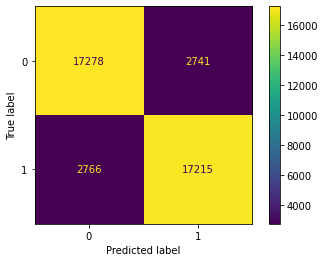

In [14]:
### confusion matrix
plot_confusion_matrix(estimator=lr, X=X_train, y_true=y_train)

In [16]:
# get model predictions 
y_pred = lr.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
metrics

(array([0.86200359, 0.86264783]),
 array([0.86308007, 0.86156849]),
 array([0.8625415 , 0.86210782]),
 array([20019, 19981]))

In [36]:
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.862004,0.862648
recall,0.863080,0.861568
f1_score,0.862541,0.862108
count_of_reviews,20019.000000,19981.000000


### validation set 

In [37]:
acc = round(lr.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 80.0 %


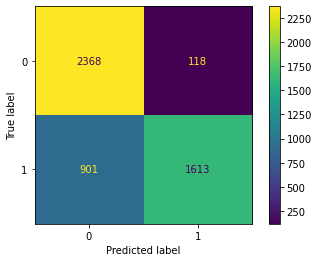

In [38]:
### confusion matrix
plot_confusion_matrix(estimator=lr, X=X_valid, y_true=y_valid)

In [39]:
y_valid_pred = lr.predX_valid(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.724381,0.931831
recall,0.952534,0.641607
f1_score,0.822937,0.759953
count_of_reviews,2486.000000,2514.000000


### Summary 
**Logistic regression** 

For **negative** reviews, the precision is 72% meaning that when the classifier predicts the positive label, it correctly identifies the negative review 72% of the time. The recall is much higher at 95%. Out of the truly negative reviews, the classifier correctly identifies them 95% of the time. 

For **positive** reviews, the precision is much higher at ~ 93%. But the recall is much lower at 64% meaning that out of the positive reviews, the classifier correctly identifies that it is positive 64% of the time. 

F1 score for **negative** reviews is 82% and the F1 score for **positive** reviews is ~ 76%. So overall, before any hyperparameter tuning, the `Logistic Regression` model performs better at identifying **negative** reviews. 

## Support Vector Machine 



### train set 

In [6]:
start = time()
svc = SVC(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for support vector machine: {} seconds.".format(round((stop - start), 2)))

training time for support vector machine: 173.79 seconds.


In [7]:
train_time = round((stop - start)/60, 2)
print('training time for support vector machine: {} minutes.'.format(train_time))

training time for support vector machine: 2.9 minutes.


**Note:**

**The train accuracy score and the plot of the confusion matrix each took a few minutes each to compute! In contrast to logistic regression which was practically instantaneous.**

In [8]:
acc = round(svc.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 92.0 %


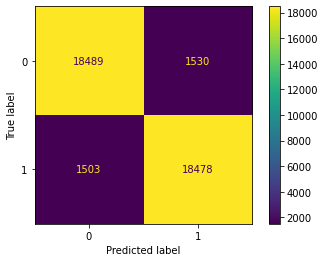

In [9]:
### confusion matrix
plot_confusion_matrix(estimator=svc, X=X_train, y_true=y_train)

In [10]:
# get model predictions 
y_pred = svc.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.924820,0.923531
recall,0.923573,0.924779
f1_score,0.924196,0.924154
count_of_reviews,20019.000000,19981.000000


### validation set 

In [15]:
acc = round(svc.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 72.0 %


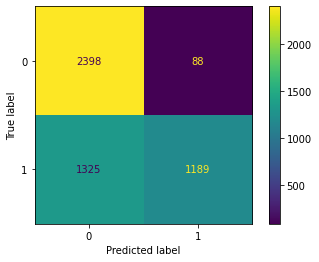

In [12]:
### confusion matrix
plot_confusion_matrix(estimator=svc, X=X_valid, y_true=y_valid)

In [14]:
y_valid_pred = svc.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.644104,0.931088
recall,0.964602,0.472951
f1_score,0.772427,0.627275
count_of_reviews,2486.000000,2514.000000


### Summary 

Without any hyperparameter tuning `SVC` performs even better on the train set than `Logistic Regression` but even worse on the validation. There is a big gap in the accuracy between train and validation which indicates overfitting. But this model would probably benefit greatly from tuning. 

For the **Negative** reviews, the `SVC` has worse precision but slightly higher recall. For **Positive** reviews the precision is the same as before but the recall is far far worse (64% for LR vs 47% for SVC). 

SVC is still performing better on negative reviews over positive reviews but it performs worse on the validation set than `Logistic Regression`. However, the model needs a tuning before I'd really be able to compare fairly. 

## Random Forest

### train set 

In [17]:
start = time()
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for random forest: {} seconds.".format(round((stop - start), 2)))

training time for random forest: 29.25 seconds.


In [19]:
acc = round(rf.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 100.0 %


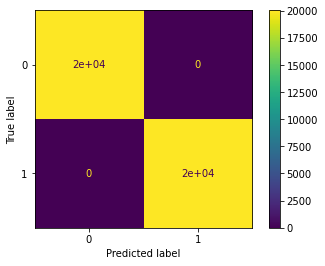

In [21]:
### confusion matrix
plot_confusion_matrix(estimator=rf, X=X_train, y_true=y_train)

In [22]:
# get model predictions 
y_pred = rf.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,1.0,1.0
recall,1.0,1.0
f1_score,1.0,1.0
count_of_reviews,20019.0,19981.0


### validation set 

In [23]:
acc = round(rf.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 68.0 %


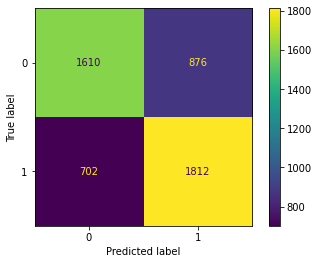

In [24]:
### confusion matrix
plot_confusion_matrix(estimator=rf, X=X_valid, y_true=y_valid)

In [25]:
y_valid_pred = rf.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.696367,0.674107
recall,0.647627,0.720764
f1_score,0.671113,0.696655
count_of_reviews,2486.000000,2514.000000


### Summary 
Off the shelf, the `Random Forest` is performing more equally on the **positive** vs **negative** reviews. Overall, it performs slighly better on **positive reviews** than **negative** reviews.

Compared to `SVC` it is performing quite a bit worse in general but again hyperparameter tuning should improve it as currently the `Random Forest` model is severely overfitting.  